# This notebook shows an example on how to calibrate parameteres using goal seeking (Targer/instruments) 

## Why specify a model in Latex? 

Sometime the **implementation** of a model in software don't match the **specification** of the model in 
the text in which the model is presented. It can be a chalange to make sure that the specification is 
updated in order to reflect changes made in the implementation. 

By extracting the model from a Latex script which describes and specify the model a one can always be sure that simulations reflect the model as described in the paper. 

Also the author is forced to make a complete specification of the model, else it won't run. 

## The Economic Credit Loss model 
This jupyter notebook is inspired by IMF working paper (WP/20/111) The Expected Credit Loss Modeling from a Top-Down Stress Testing Perspective by Marco Gross, Dimitrios Laliotis, Mindaugas Leika, Pavel Lukyantsau. The working paper and the associated material is located https://www.imf.org/en/Publications/WP/Issues/2020/07/03/Expected-Credit-Loss-Modeling-from-a-Top-Down-Stress-Testing-Perspective-49545

from the abstract of the paper: 
> The objective of this paper is to present an integrated tool suite for IFRS 9- and CECL compatible
estimation in top-down solvency stress tests. The tool suite serves as an
illustration for institutions wishing to include accounting-based approaches for credit risk
modeling in top-down stress tests.

This is a jupyter notebook build with the purpose of illustrating the conversion of a model from Latex to ModelFlow. The purpose is testing so take very much care.  

## Import libraries 

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from IPython.core.display import HTML,Markdown,Latex


from modelclass import model
import modeljupytermagic

# some useful stuf
model.widescreen()
pd.set_option('display.max_rows', None, 'display.max_columns', 10, 'display.precision', 2)
sortdf = lambda df: df[sorted([c for c in df.columns])]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fetch the precooked model and baseline 
The model and data has been specified in another Jupyter notebook: 

[file/Model for economic credit loss with Z score transition nynamic - setup]

In [4]:
ecl,baseline  = model.modelload('ecl.pcim')

## Input values for the adverse scenario

In [5]:
%%dataframe projection_adverse nshow
LOAN_GROWTH	M_S1	M_S2	WRO_S3	Z
2021	1.00e-02	0.04	0.03	0.06	0.00
2022	-1.00e-02	0.04	0.03	0.06	-0.65
2023	-8.00e-03	0.04	0.03	0.06	-0.84
2024	-6.00e-03	0.04	0.03	0.06	-0.99
2025	-4.00e-03	0.04	0.03	0.06	-0.69
2026	-2.00e-03	0.04	0.03	0.06	-0.39
2027	-0.00e+00	0.04	0.03	0.06	-0.24

## Create an adverse Dataframe

In [6]:
adverse = baseline.copy()
adverse.update(projection_adverse)

## Run Model
For the Baseline and the adverse scenario 

In [7]:
base_result  = ecl(baseline,'2022','2026',keep='Baseline',silent=1)
adverse_result = ecl(adverse,keep = 'Adverse')

## Find the Z consistent with an increase in Probability of default 
Here the .invert (goal seeking) method. It can be used for multible goals and targets, but here only for one of each  

In [8]:
targets = adverse.loc['2022':,['PD_PIT']]+0.005    # set the target (goal)
instruments = ['Z']                            # Set the instrumt
res = ecl.invert(baseline,targets = targets, instruments = instruments) # Now run 
ecl.keep_solutions['PD_PIT target'] = res

Finding instruments :   0%|          | 0/6

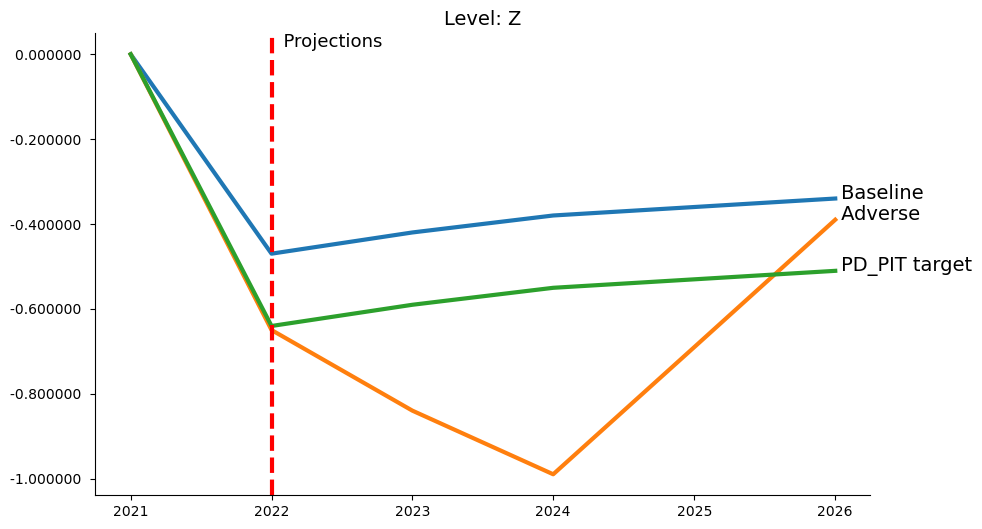

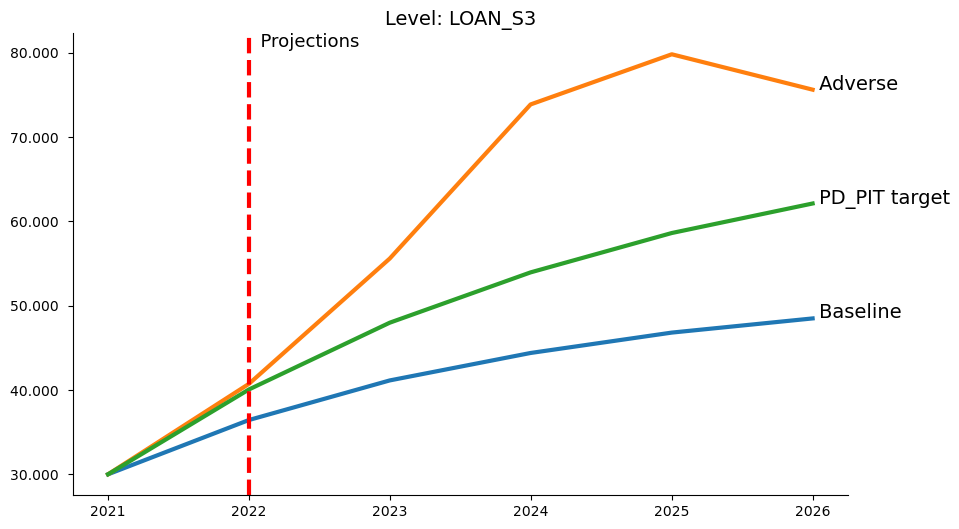

In [9]:
import datetime
ecl.smpl('2021','2026')
figs = ecl.keep_plot('z loan_S3',showtype='level',legend=False,
              vline=[('2022','  Projections')]);

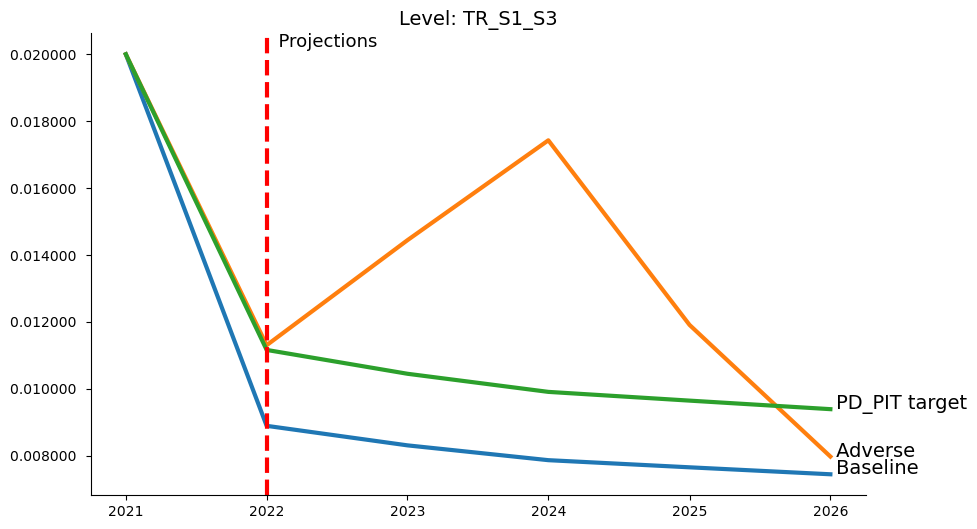

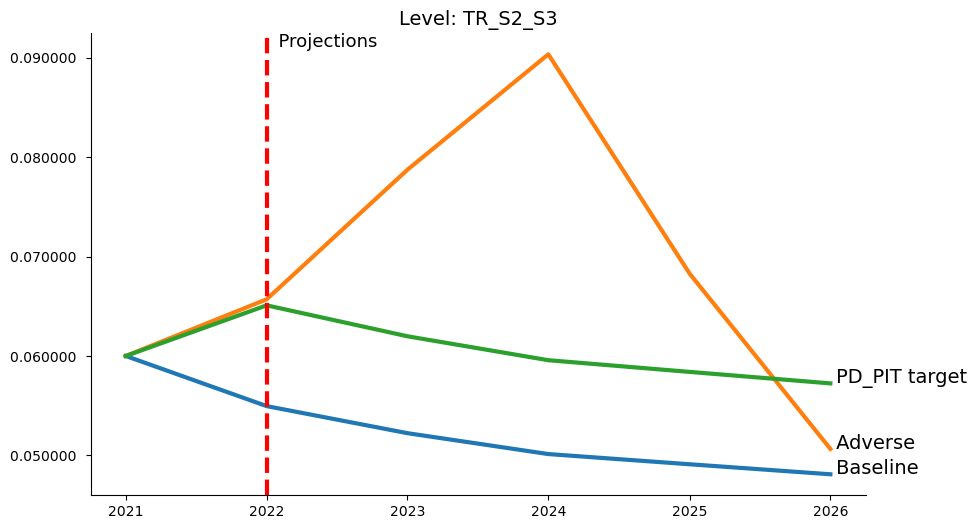

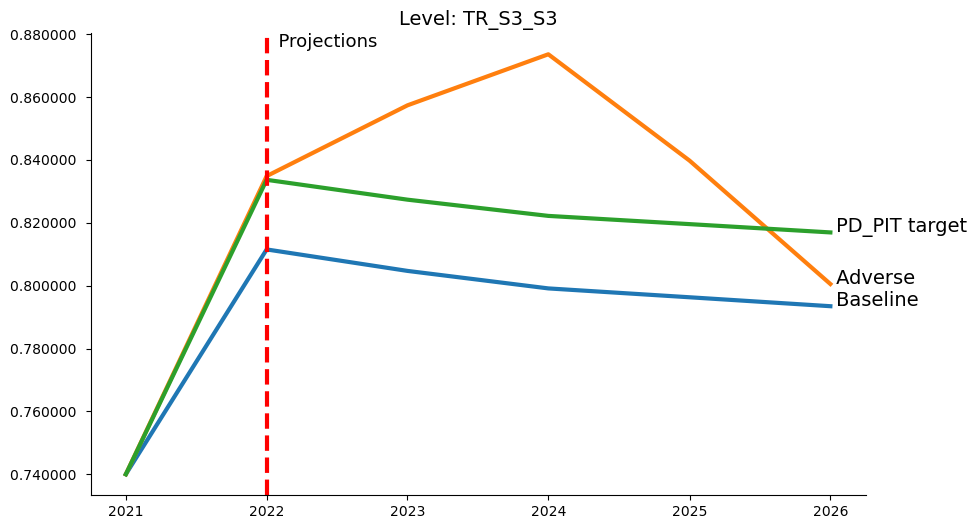

In [10]:
figs = ecl.keep_plot('tr_*_S3',showtype='level',legend=False);